# Шаг 4. Визуализация (максимум 20 баллов) и Шаг 5. Создание новых признаков (максимум 10 баллов)

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [72]:
df_info = pd.read_csv('C:\\артем общее2\\учеба\\уник\\python\\питон2\\Проект\\ИТОГ 01.06\\пречесанные данные_01.06.csv')
df_info.head()

,Link,Цена,Пешком до метро,Станция метро,Общая площадь,Жилая площадь,Площадь кухни,Высота потолков,Санузел,Балкон/лоджия,...,Год постройки,Строительная серия,Тип дома,Районы,Округа,В квартире есть,Залог,Срок аренды,Апартаменты,Кол-во комнат
0,https://www.cian.ru/rent/flat/257204026/,32000.0,10.0,Черкизовская,40.0,18.3,7.6,2.48,1.0,0.0,...,1974.0,ii-68,Панельный,Преображенский район,СВАО,"['Холодильник', 'Стиральная машина', 'Телевизо...",32000,от года,0,1
1,https://www.cian.ru/rent/flat/301264083/,150000.0,14.0,Спортивная,58.1,41.0,9.0,2.70,1.0,0.0,...,1957.0,Индивидуальный проект,Кирпичный,'р-н Хамовники',ЦАО,"['Холодильник', 'Посудомоечная машина', 'Стира...",150000,от года,0,2
2,https://www.cian.ru/rent/flat/300924649/,150000.0,13.0,Улица 1905 года,69.0,35.0,10.0,3.00,2.0,0.0,...,2018.0,Индивидуальный проект,Монолитный,'р-н Пресненский',ЦАО,"['Холодильник', 'Посудомоечная машина', 'Стира...",150000,от года,0,2
3,https://www.cian.ru/rent/flat/293041539/,450000.0,7.0,Смоленская,200.0,151.0,20.0,2.70,3.0,1.0,...,2010.0,Индивидуальный проект,Монолитный,'р-н Арбат',ЦАО,"['Холодильник', 'Посудомоечная машина', 'Стира...",450000,от года,0,2
4,https://www.cian.ru/rent/flat/301951602/,103600.0,17.0,Рабочий посёлок,62.0,36.0,10.0,2.70,1.0,0.0,...,2019.0,Индивидуальный проект,Монолитный,'р-н Можайский',ЗАО,"['Холодильник', 'Стиральная машина', 'Телевизо...",0,от года,0,2


__Напомним про разбиение на группы__

In [73]:
target = ['Цена']

perem_nepr = df_info.select_dtypes(include=['int64', 'float64']).columns.values
perem_cat = df_info.select_dtypes(include=['object']).drop(columns = ['Link', 'В квартире есть']).columns.values # не взяли 2 yt ytghthsdyst переменные, на данном этапе они не репрезентативны

print(f'Целевая переменная: {target}')
print(f'Непрерывные переменные: {perem_nepr}')
print(f'Дискретные переменные: {perem_cat}')

Целевая переменная: ['Цена']
Непрерывные переменные: ['Цена' 'Пешком до метро' 'Общая площадь' 'Жилая площадь' 'Площадь кухни'
 'Высота потолков' 'Санузел' 'Балкон/лоджия' 'Год постройки' 'Залог'
 'Апартаменты']
Дискретные переменные: ['Станция метро' 'Ремонт' 'Строительная серия' 'Тип дома' 'Районы'
 'Округа' 'Срок аренды' 'Кол-во комнат']


### Рассмотрим взаимосвязи между всеми непрерывными переменными

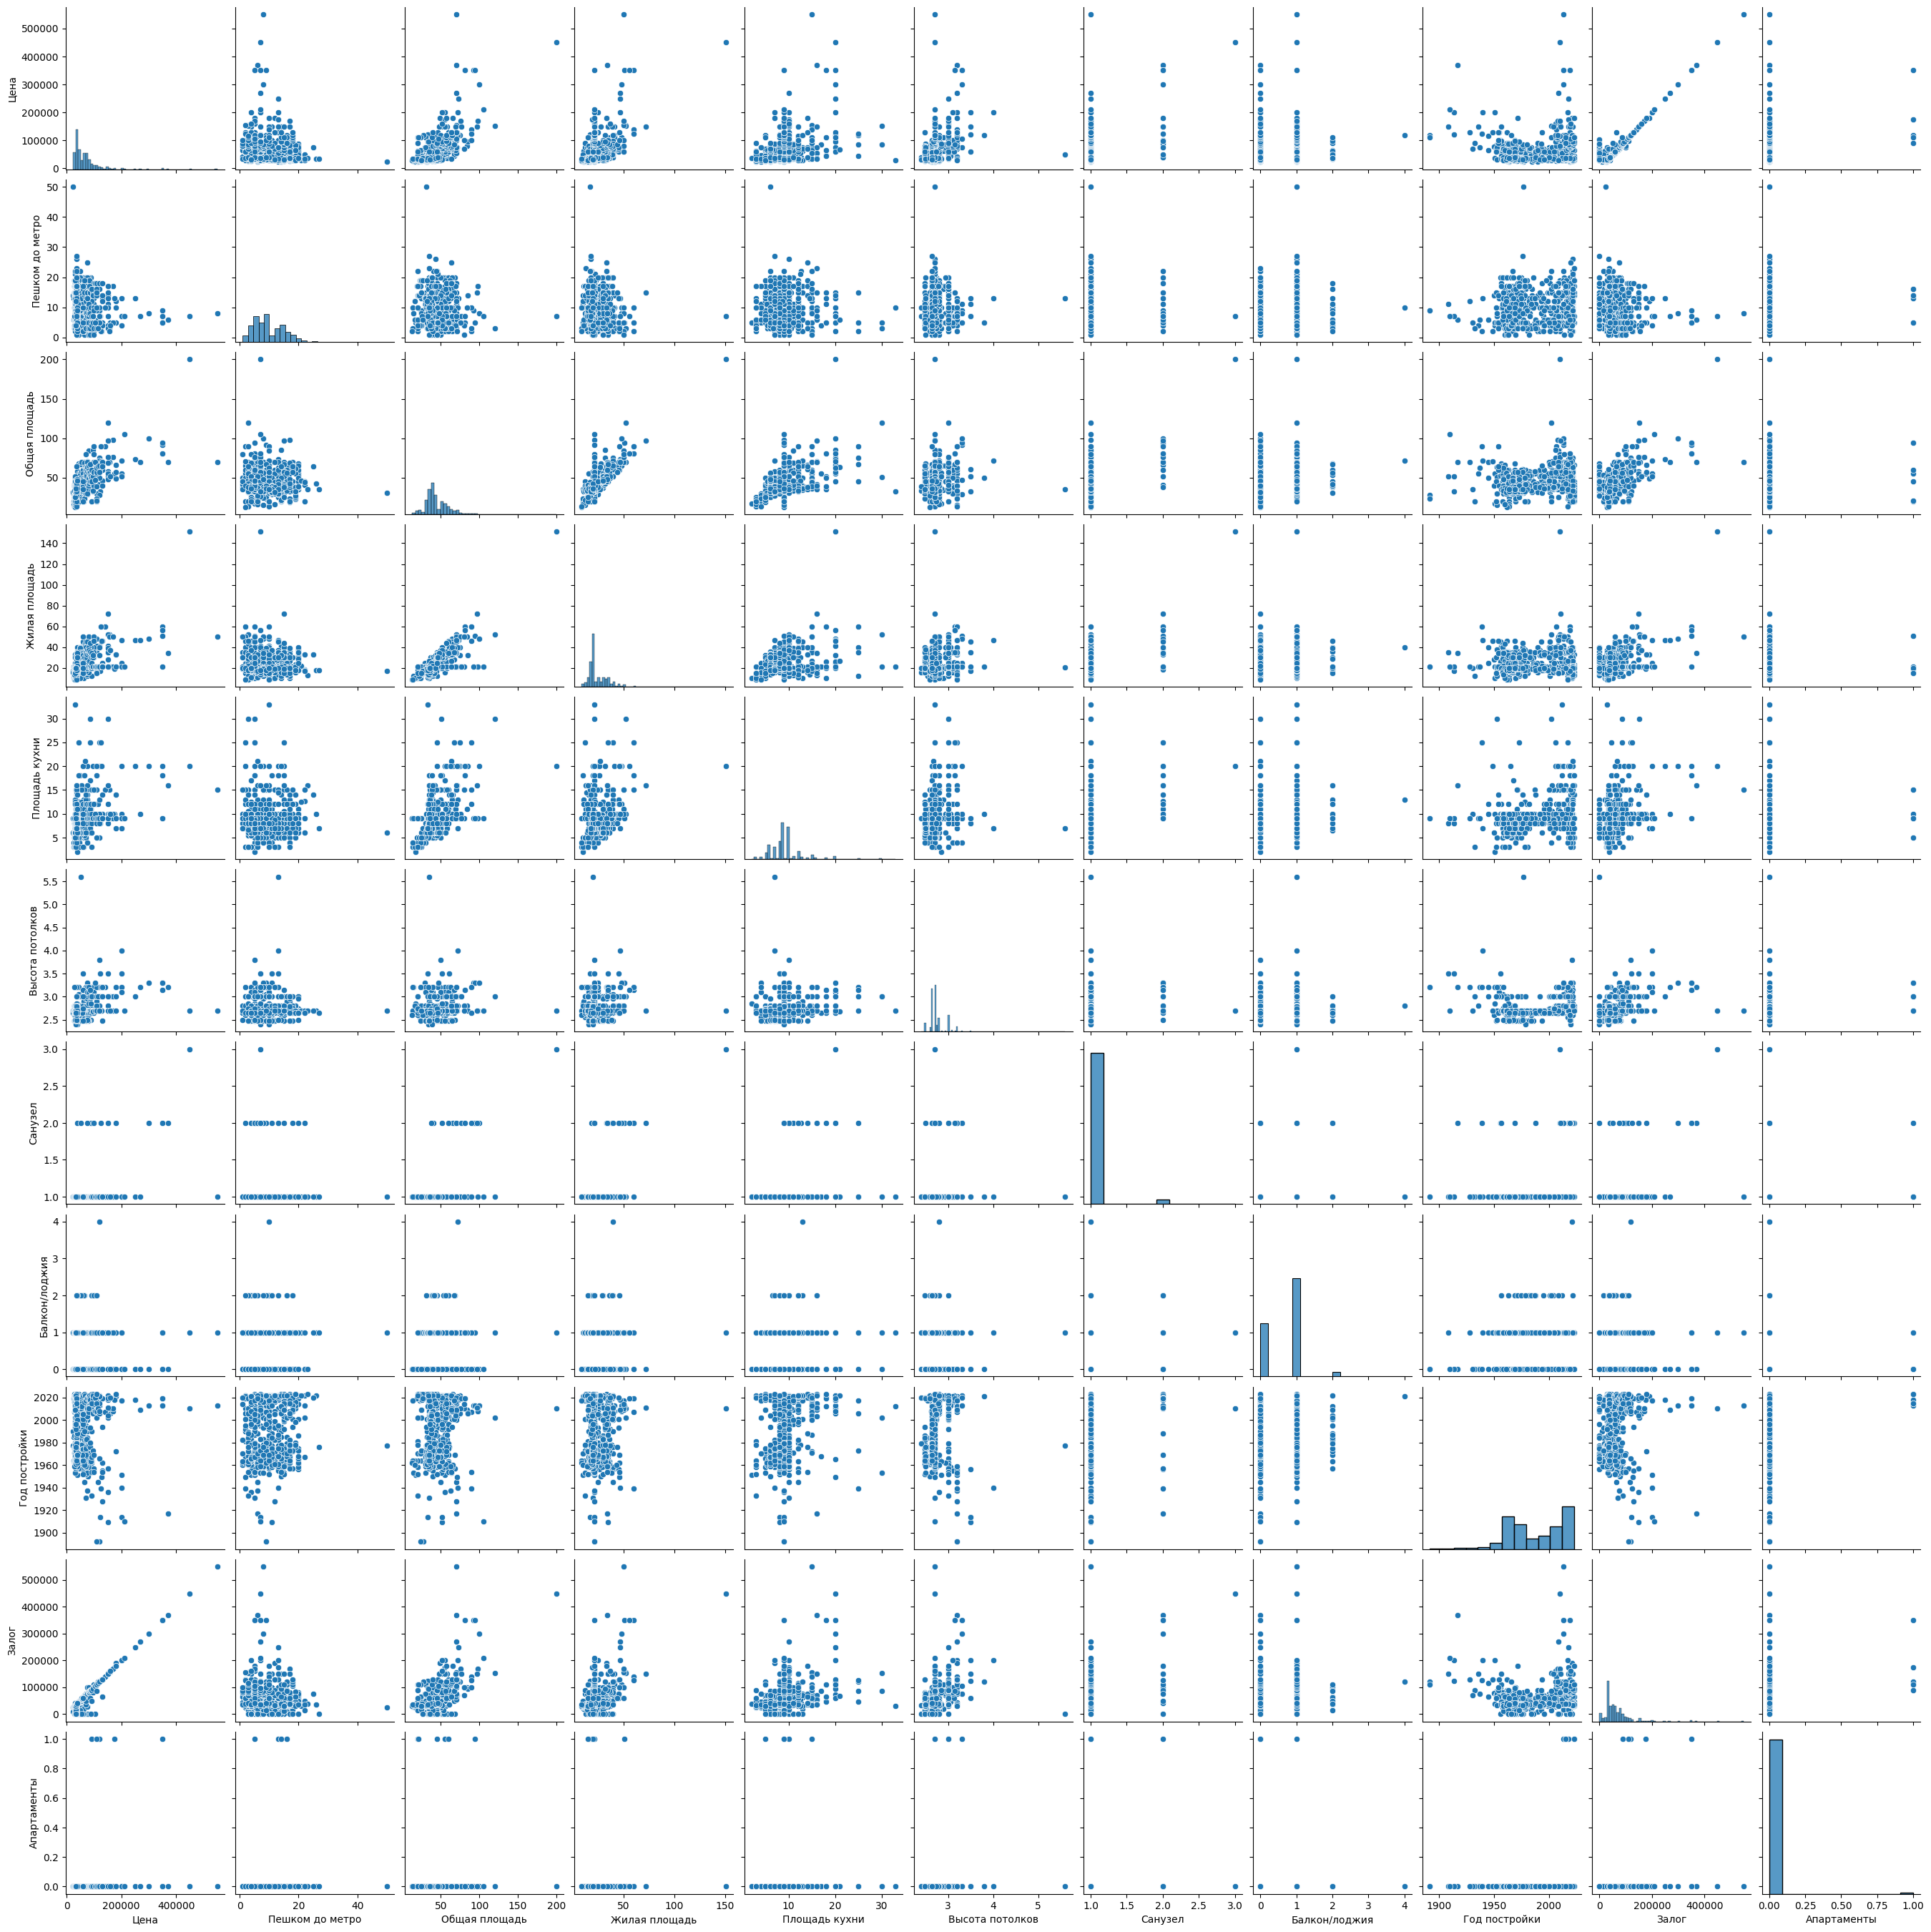

In [74]:
sns.pairplot(df_info[perem_nepr])

__Выводы:__
график очень громоздкий, но зато позволяет обобщенно окинуть взглядом ситуацию, выделив наиболее интересные на первый взгля направления на визуализации и более подробного анализа.
Сразу можно прописать, что по этим графкам в первую очередь наиболее интересным кажется рассмотрение зависимостей: 
- Между ценой постройки наблюдается некоторая интересная нелинейная зависимость. Наблюдается множество выбросов у новых номов и достачно старых. Это стоит рассмотреть более подробно;
- цена, высота потолков, жилая и общая площади: между этими признаками наблюдается взаимосвязь близкая к линейной (по грубой оценке)
- Цена и площадь кухни: здесь интересное распределение, котороые напоминает нормальное, что достаточно инетерсно. 
- Апартаменты преобладают. Незначительное олк-во квартир не является аппартаметнами, что делает эту переменную достаточно бесполезной на первый взгляд
- Залог пропорционален цене, что делает эту переменную не особо интересной для рассмотрения



### Рассмотрим целевую переменную

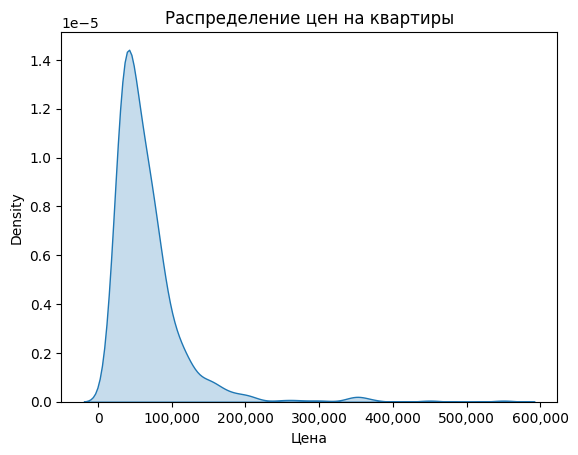

In [75]:
from matplotlib.ticker import FuncFormatter
sns.kdeplot(df_info['Цена'] , fill = True)
plt.title('Распределение цен на квартиры')
def format_func(x, pos):
    ans = '{:,.0f}'.format(x)
    return(ans)

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_func))

Основная масса значений сконцентрирована в диапазоне до 100,000. Это говорит о том, что большинство квартир на рынке имеют относительно низкую цену. В целом функция распределения имеет правостороннюю скошенность, что говорит о том, что цены на квартиры сконцентрированы преимущественно в низких значениях. Длинный хвост графика уходит вправо.Это показывает наличие небольшого количества квартир с очень высокими ценами, это задает небольшую часть рынка элитной недвижимости

__Также преступлением будет, если вначале проведем корреляционный анализ__

<Axes: title={'center': 'Тепловая карта корреляции всех непрерывных переменных'}>

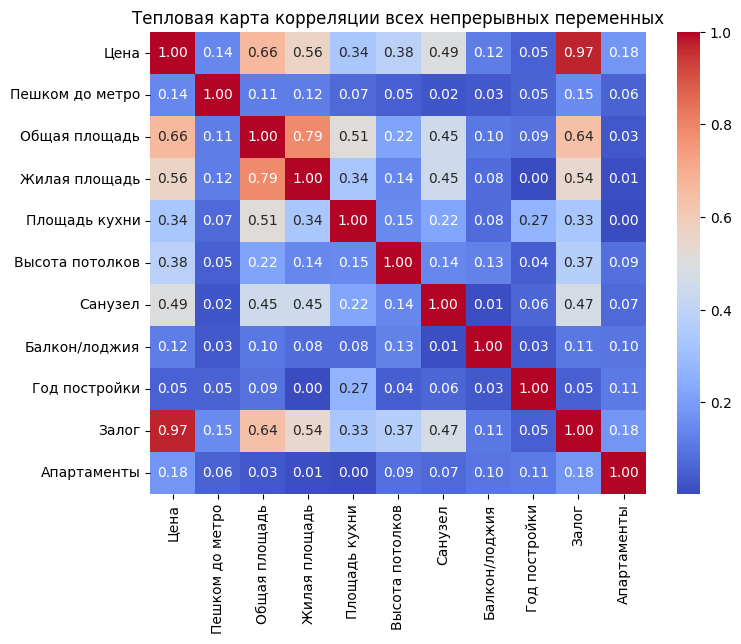

In [76]:
plt.figure(figsize = (8,6))
plt.title('Тепловая карта корреляции всех непрерывных переменных')
sns.heatmap(df_info[perem_nepr].corr(method = 'pearson').abs(), annot = True, fmt = '.2f', cmap='coolwarm' )

Выделим ячейки, в которых корреляция выше 0,25 по модулю

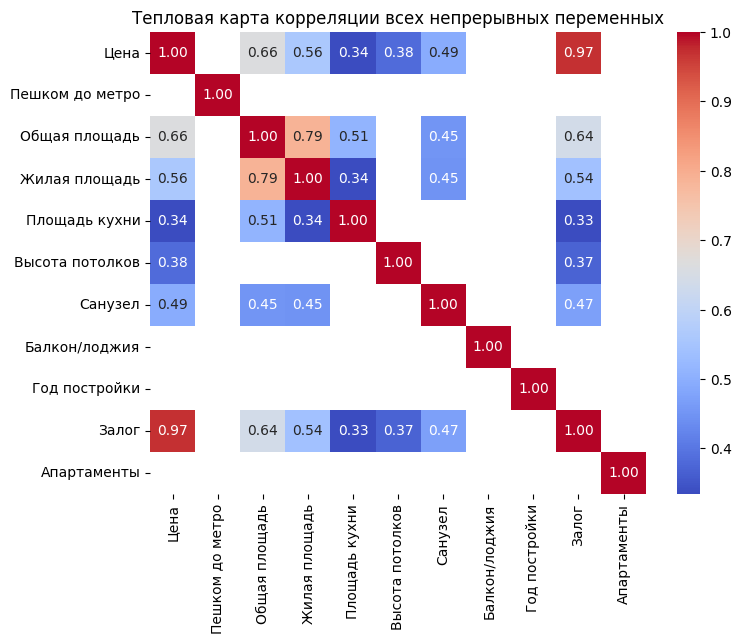

In [77]:
plt.figure(figsize = (8,6))
plt.title('Тепловая карта корреляции всех непрерывных переменных')
heatmap = sns.heatmap(df_info[perem_nepr].corr(method='pearson'),annot=True, fmt='.2f', mask=df_info[perem_nepr].corr(method='pearson').abs() < 0.3, cmap='coolwarm')

- Сильная положительная корреляция с Залог (0.97), вероятно, залог = стоимость 1 месяца аренды. Этот вывод можно сделать на основе того, что зависимость почти линейна, а прямая имеет наклон около 45 градусов
- Умеренная положительная корреляция с Общая площадь (0.66) и Жилая площадь (0.56), что ожидаемо, так как большие квартиры обычно дороже.
- Также наблюдается значительная зависимость от кол-ва санузлов, кол-во которых положительно зависит от площади. Тут все тривиально: чем больше квартира, тем большее олк-во санузлов необходимо.
- Также на цену умеренно положительная корреляция с высотой потолков.
- Сильная положительная корреляция с Жилая площадь (0.79), что логично, так как большая общая площадь квартиры обычно включает большую жилую площадь.
- Высота потолков и Санузел имеют слабые корреляции с другими переменными, что может говорить о их меньшем влиянии на другие параметры.
- Баккон/лоджия и Год постройки также показывают слабую корреляцию с большинством переменных, что может свидетельствовать о разнородности влияния этих факторов на другие параметры.
- Очень слабая корреляция с Цена (0.14), что может означать, что расстояние до метро не является значительным фактором при определении стоимости квартиры в этом наборе данных, однако, это достаточно неожиданно, поэтому попробуйем рассмотреть более подробно эту зависимость позднее

### Площади


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


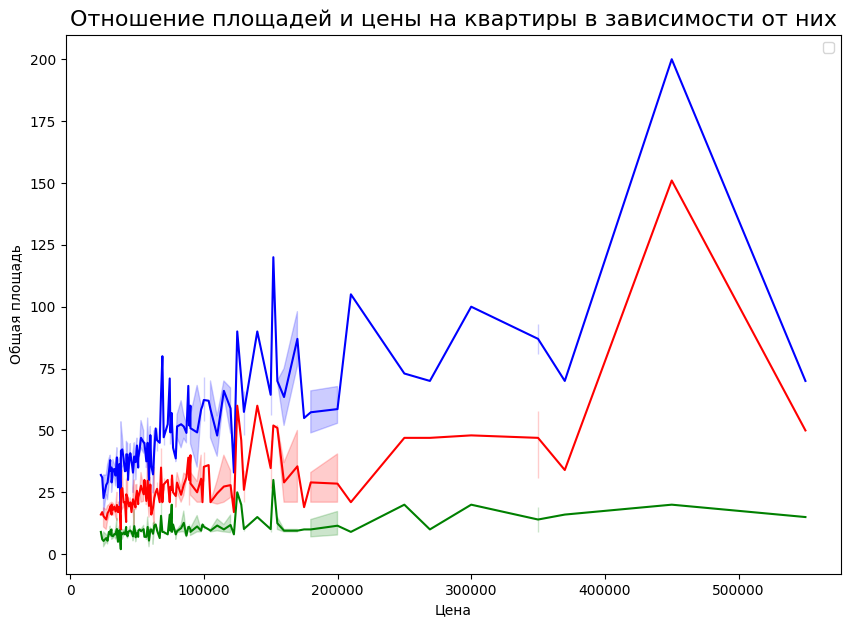

In [78]:
plt.figure(figsize=(10,7))

plt.title('Отношение площадей и цены на квартиры в зависимости от них', fontsize=16)
sns.lineplot(data=df_info, x = 'Цена', y = 'Общая площадь', color='b')
sns.lineplot(data=df_info, x = 'Цена', y = 'Жилая площадь', color='r')
sns.lineplot(data=df_info, x = 'Цена', y = 'Площадь кухни', color='g')

plt.legend()

Мы уже по корреляционной матрице поняли, что есть четкая зависимость между ценой и переменными площадей, однако, здесь мы хотели рассмотреть возможные предпочтения по отношениям этих площадей друг с другом. 
1) На основе этого графика уже можно выдвинуть предположение о том, что отношение общей площади и жилой растет пропорционально росту цены на квартиру.
2) Также на графике можно было заметить факт того, что площадь кухни незначительно изменяется относительно других переменных площади. В целом, этого и стоило ожидать, так как коэф корреляции площади кухнии наименьший среди этих трех переменных. В этом случае интересно посмотреть более подробно на график зависимость площади кухни и цены на квартиру, а также рассмотреть зависимость года постройки и площади кухни, так как эти у площади кухни с ней одна из наиболее высоких коэф корреляции

Для начала рассмотрим 2ое:


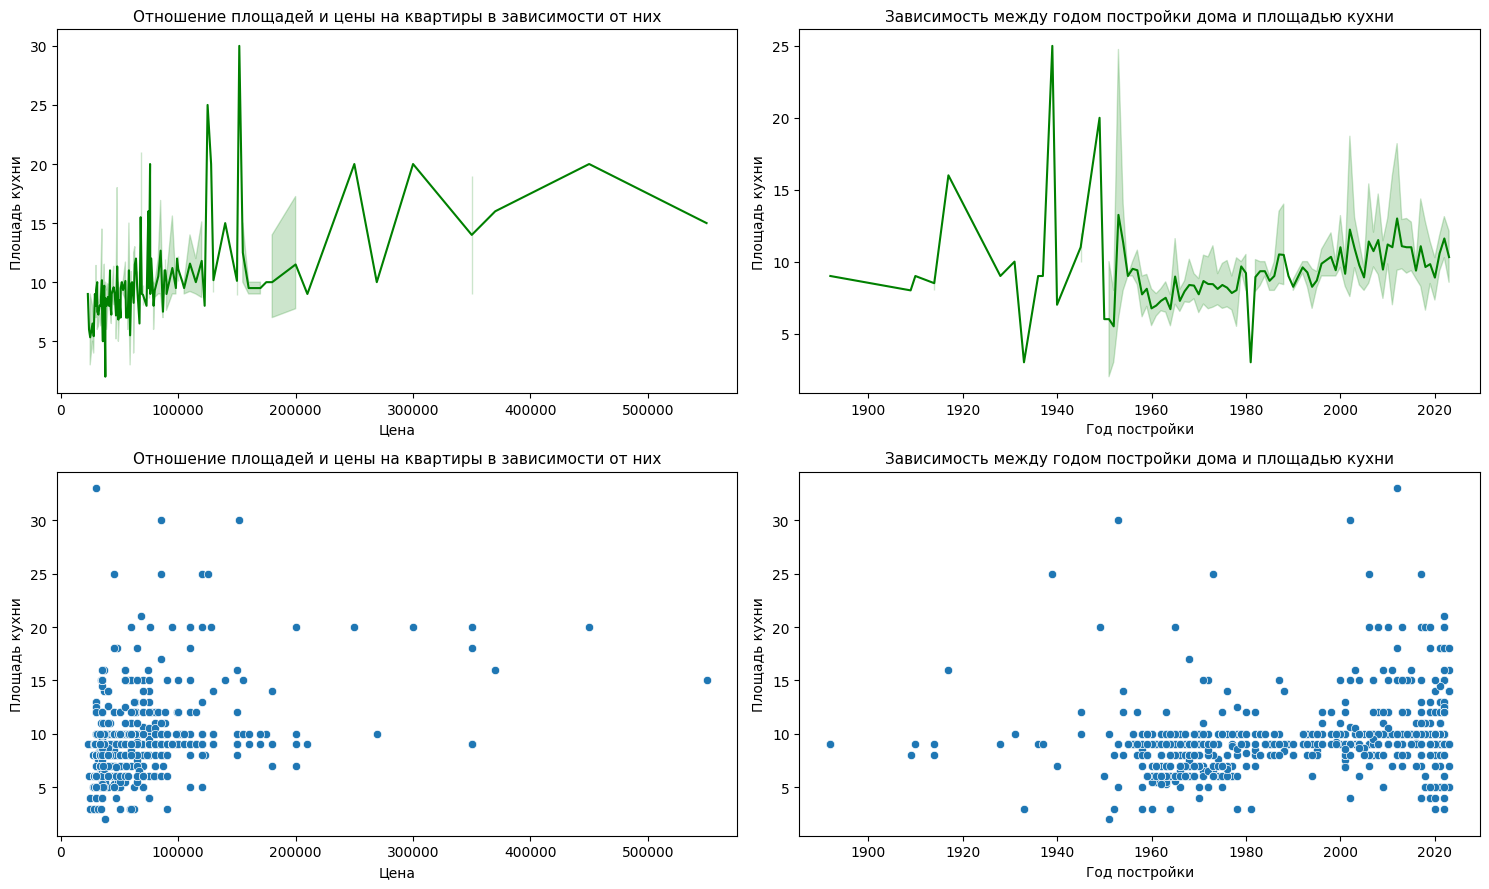

In [79]:

plt.figure(figsize=(15,9))

plt.subplot(2, 2, 1)
plt.title('Отношение площадей и цены на квартиры в зависимости от них', fontsize=11)
sns.lineplot(data=df_info, x='Цена', y='Площадь кухни', color='g')

plt.subplot(2, 2, 2)
plt.title('Зависимость между годом постройки дома и площадью кухни', fontsize=11)
sns.lineplot(data=df_info, x='Год постройки', y='Площадь кухни', color='g')

plt.subplot(2, 2, 3)
plt.title('Отношение площадей и цены на квартиры в зависимости от них', fontsize=11)
sns.scatterplot(data=df_info, x='Цена', y='Площадь кухни')

plt.subplot(2, 2, 4)
plt.title('Зависимость между годом постройки дома и площадью кухни', fontsize=11)
sns.scatterplot(data=df_info, x='Год постройки', y='Площадь кухни')


plt.tight_layout()
plt.show()


__Выводы:__ 
По верхнему правому графику можем увидеть значительный разброс значений площади у очень старых домой с годом постройки меньше 1950 года. Однако, судя по нижнему правому графику это связано скорее с небольшим количеством данных о них, что не позволяет делать никаких существенных выводах о домах этих лет. Также в более поздние годы можем наблюдать рост площадей кухни, однако, вероятно это связано скорее с ростом строительства более премиального жилья. Это можно понять при рассмотрении графиков "Отношение площадей и цены на квартиры в зависимости от них", где после 10 кв.м площади кухни цена на квартиру начинает значительно увеличиваться. То есть есть некоторое плато после которого небольшое увеличение разамеров кухни ведет к существенному росту цены за квартиру.

В связи с этим можем выдвинуть предположение: Квартиры, которые имеют площадь кухни выше некоторого значения существенно дороже по цене и относятся скорее к премиальным квартирам

Наиболее часто встречающаяся площадь кухни (Мода): 9.0
Медианное значение переменной площадь кухни: 9.0
90% перцентиль площади кухни: 13.0


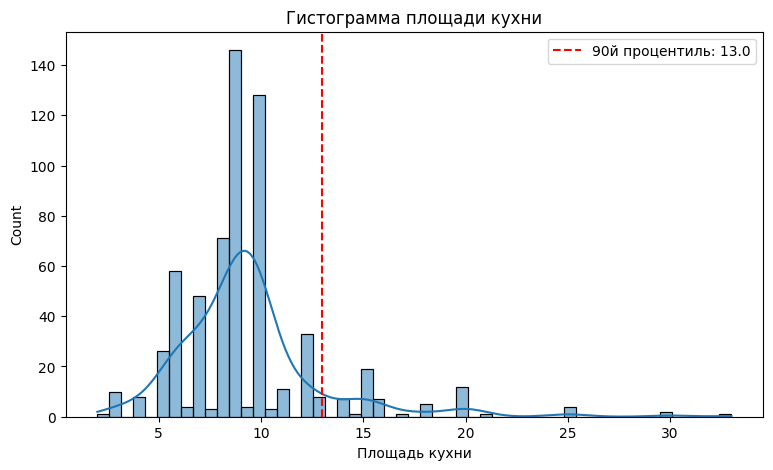

In [80]:
x = df_info['Площадь кухни'].mode()
y = df_info['Площадь кухни'].median()
q3 = df_info['Площадь кухни'].quantile(0.9)
print(f'Наиболее часто встречающаяся площадь кухни (Мода): {x[0]}')
print(f'Медианное значение переменной площадь кухни: {y}')
print(f'90% перцентиль площади кухни: {q3}')

plt.figure(figsize=(9, 5))
plt.title('Гистограмма площади кухни')
sns.histplot(df_info['Площадь кухни'], kde=True)

plt.axvline(q3, color='r', linestyle='--', label=f'90й процентиль: {q3}')
plt.legend()
plt.show()


На основе предположения выше и данных квантиля 90% показателей сформируем гипотезу

__Гипотеза 1:__ Квартиры, которые имеют площадь кухни выше 13 кв.м. существенно дороже по цене и относятся скорее к премиальным квартирам. то есть их цена значительно превышает остальные

__Теперь рассмотрим предположение о том, что отношение общей площади и жилой растет пропорционально росту цены на квартиру. Для этого необходимо ввести новую переменную__

### Кол-во комнат

C:\Users\isobo\AppData\Local\Temp\ipykernel_9556\2252683289.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_info, x='Кол-во комнат', y='Цена', estimator=np.mean, ci=None)


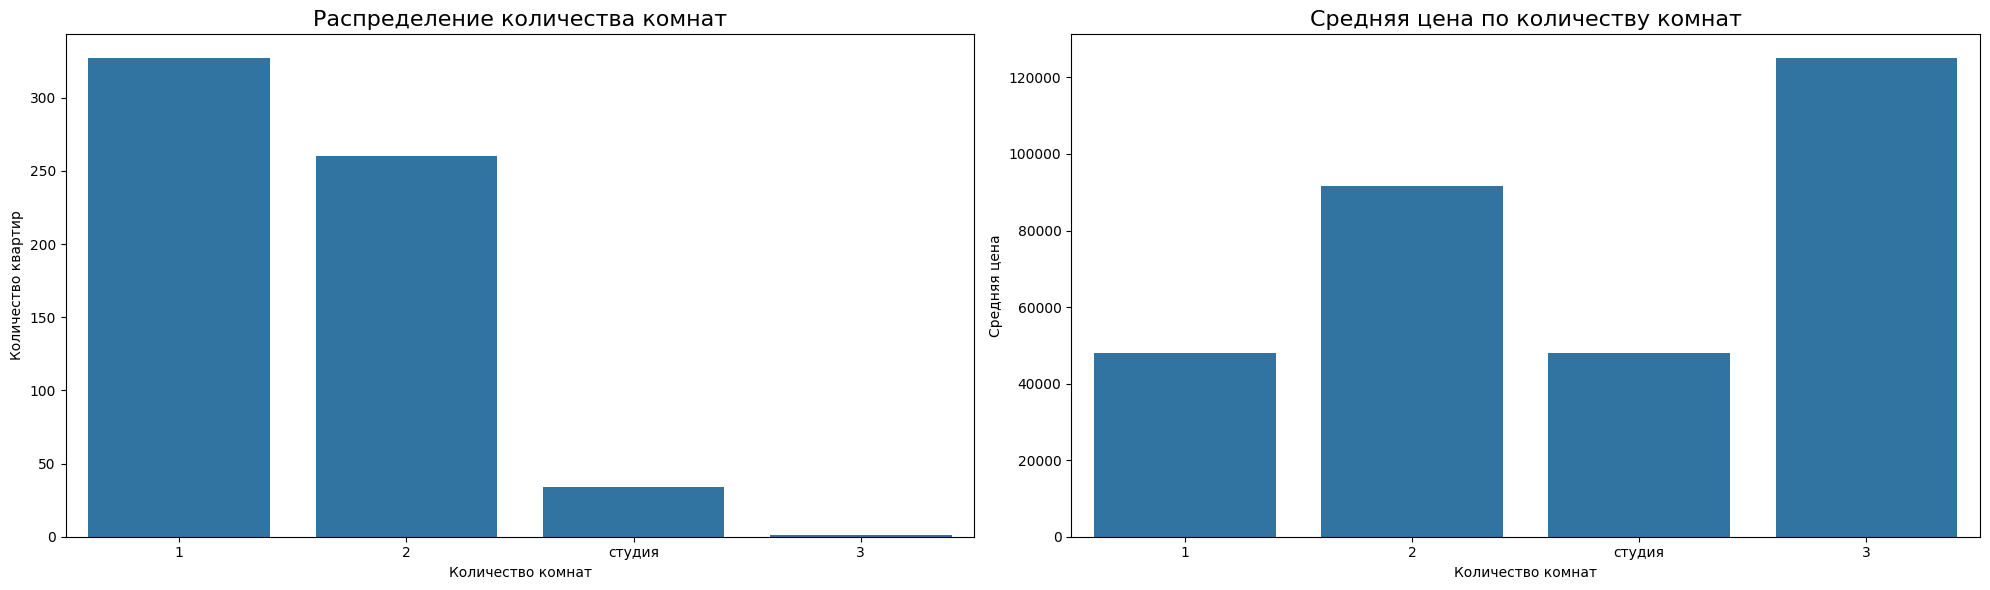

In [81]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.title('Распределение количества комнат', fontsize=16)
room_counts = df_info['Кол-во комнат'].value_counts().reset_index()
room_counts.columns = ['Кол-во комнат', 'Количество']
sns.barplot(data=room_counts, x='Кол-во комнат', y='Количество')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')

plt.subplot(1, 2, 2)
plt.title('Средняя цена по количеству комнат', fontsize=16)
sns.barplot(data=df_info, x='Кол-во комнат', y='Цена', estimator=np.mean, ci=None)
plt.xlabel('Количество комнат')
plt.ylabel('Средняя цена')

plt.tight_layout()  
plt.show()

При этом хочется все таки учитывать различе квадратных метров у однушки и студии, так как это напрямую влияет на цену, поэтому создадим переменную стоимости за 1 кв.м. Введем ее и пересмотрим соотношение цен

### Новая переменная 1 - 'Стоимость за 1 кв.м'

C:\Users\isobo\AppData\Local\Temp\ipykernel_9556\163591567.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_info, x='Кол-во комнат', y='Цена', estimator=np.mean, ci=None)
C:\Users\isobo\AppData\Local\Temp\ipykernel_9556\163591567.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_info, x='Кол-во комнат', y='Стоимость за 1 кв.м', estimator=np.mean, ci=None)


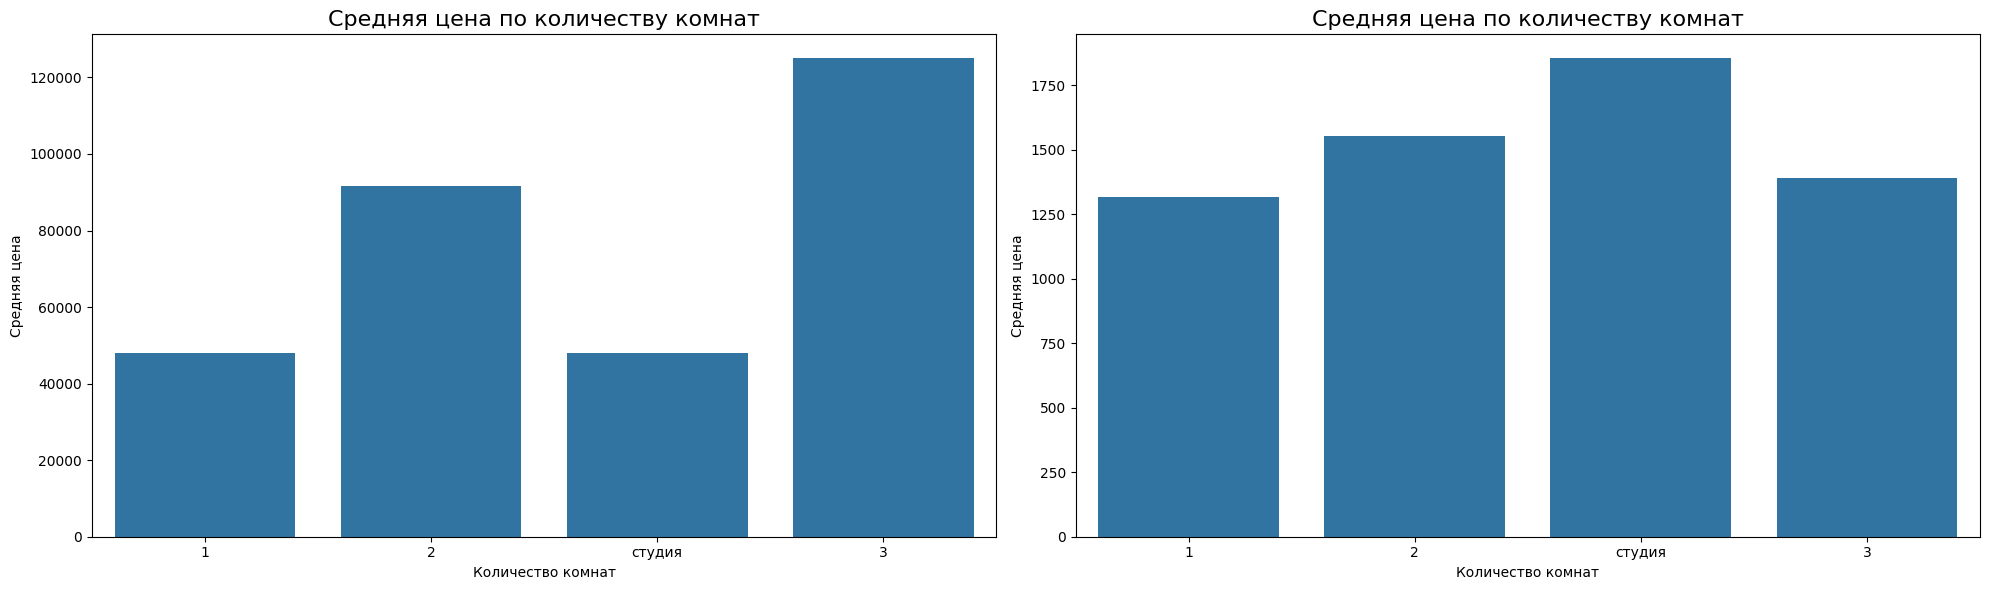

In [82]:
df_info['Стоимость за 1 кв.м'] = df_info['Цена']/df_info['Общая площадь']

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.title('Средняя цена по количеству комнат', fontsize=16)
sns.barplot(data=df_info, x='Кол-во комнат', y='Цена', estimator=np.mean, ci=None)
plt.xlabel('Количество комнат')
plt.ylabel('Средняя цена')

plt.subplot(1, 2, 2) 
plt.title('Средняя цена по количеству комнат', fontsize=16)
sns.barplot(data=df_info, x='Кол-во комнат', y='Стоимость за 1 кв.м', estimator=np.mean, ci=None)
plt.xlabel('Количество комнат')
plt.ylabel('Средняя цена')

plt.tight_layout()


На основе этих графиков можно сразу выдвинуть еще предположение, чнять студию стоит так же, как и однушку, но прежде чем формулировать более точные гипотезы поработаем еще с площадями этих групп, так как это переменная больше всего влияет на цену квартиры

### Новая переменная 2 - 'Процент нежилой площади от жилой'

Мы уже посмотрели на изменение площади кухни, но стало интересно, как ведет себя соотношение нежилой площади и жилой. Возможно, элитное жилье имеет некоторую специфику между этим отношением. На первый взгляд кажется, что процент должен незначительно изменяться, а потом расти, так как сначала у квартиры просто нужно увеличить все пространство, а потом уже начинать уделять внимание мелочам по типу большой ванной, каридору и тп. Следовательно, введем эту переменную и посмотрим, как изменяется соотношение площадей в зависимости от стоимость аренды квартиры. 

При этом важно рассматривать квартиры одного с одим и тем же кол-вом комнат, чтобы не рассматривали значительно увеличение жилой площади только из за добавления жилых комнат

Рассмотрим зависимость между новой переменной и ценой

In [83]:
data_studio = df_info[df_info['Кол-во комнат'] == 'студия']
data_1_room = df_info[df_info['Кол-во комнат'] == '1']
data_2_rooms = df_info[df_info['Кол-во комнат'] == '2']
data_3_rooms = df_info[df_info['Кол-во комнат'] == '3']

# Вычислим коэф коррелияции для переменных
correlation_studio = data_studio[['Цена', 'Общая площадь']].corr().iloc[0, 1]
correlation_1_room = data_1_room[['Цена', 'Общая площадь']].corr().iloc[0, 1]
correlation_2_rooms = data_2_rooms[['Цена', 'Общая площадь']].corr().iloc[0, 1]
correlation_3_rooms = data_3_rooms[['Цена', 'Общая площадь']].corr().iloc[0, 1]

# Создадим таблицу для упрщения восприятия
correlation_table = pd.DataFrame({
    'Кол-во комнат': ['студия', '1', '2', '3'],
    'Коэффициент корреляции': [correlation_studio, correlation_1_room, correlation_2_rooms, correlation_3_rooms]
})
correlation_table

,Кол-во комнат,Коэффициент корреляции
0,студия,0.565662
1,1,0.299731
2,2,0.622125
3,3,NaN


__Интересный вывод:__ переменная 'Отношение нежилой и жилой площадей в зависимости от кол-ва комнат' в значительной мере влияет на цену квартиры. В случае студии  двухкомнатной квартиры эта переменная оказывает второе по значимости влияение после общей площади. Это говорит о том, что кол-во нежилой площади связано с удобством и комнфортом проживания в квартире.

Также еще сформируем одну __гипотезу 4:__

__Гипотеза 4:__   Чем ближе к центру, тем ниже отношение нежилой и жилой площадей 

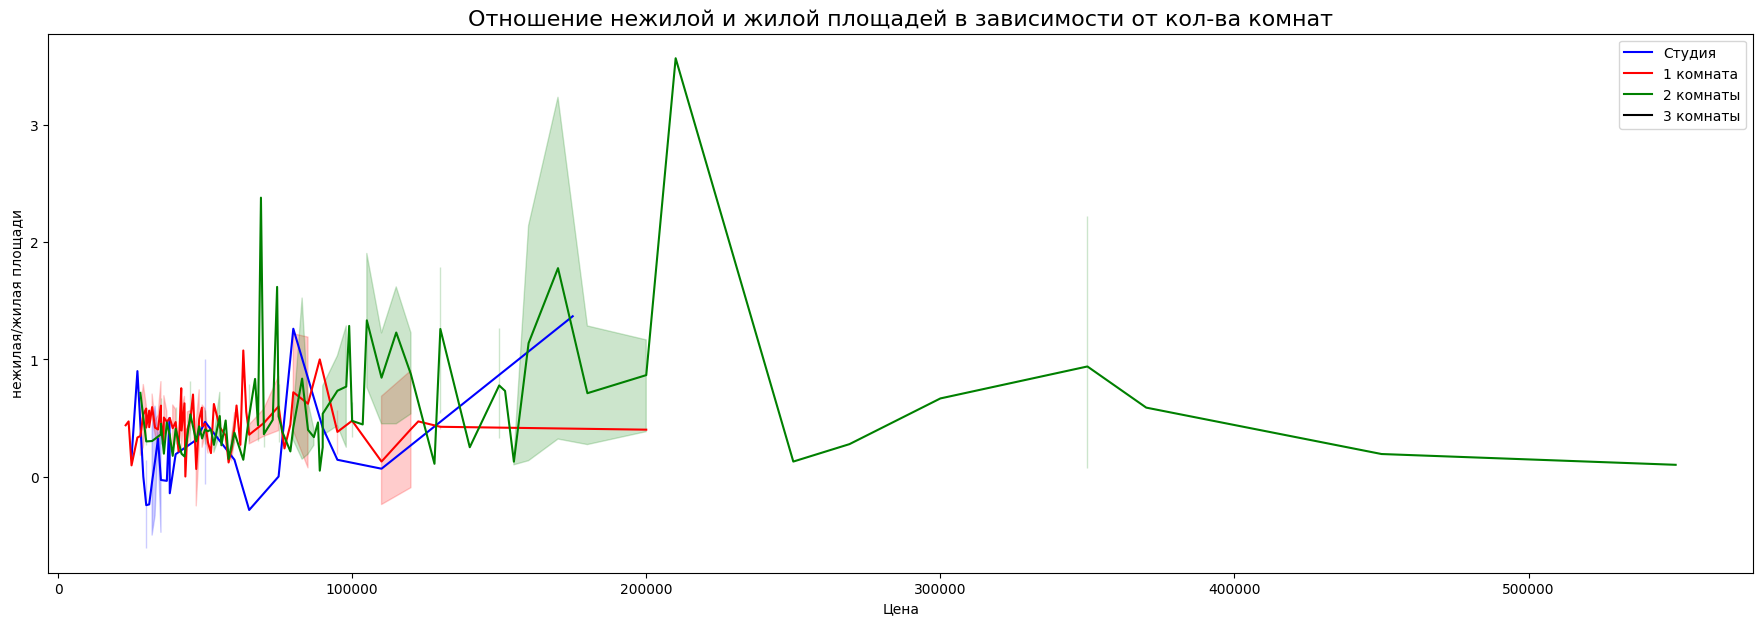

In [84]:
df_info['нежилая/жилая площади'] = (df_info['Общая площадь']-df_info['Площадь кухни'] - df_info['Жилая площадь'])/df_info['Жилая площадь']


plt.figure(figsize=(22,7))

plt.title('Отношение нежилой и жилой площадей в зависимости от кол-ва комнат', fontsize=16)
sns.lineplot(data=df_info[df_info['Кол-во комнат'] == 'студия'], x = 'Цена', y = 'нежилая/жилая площади', color='b', label='Студия')
sns.lineplot(data=df_info[df_info['Кол-во комнат'] == '1'], x = 'Цена', y = 'нежилая/жилая площади', color='r', label='1 комната')
sns.lineplot(data=df_info[df_info['Кол-во комнат'] == '2'], x = 'Цена', y = 'нежилая/жилая площади', color='g', label='2 комнаты')
sns.lineplot(data=df_info[df_info['Кол-во комнат'] == '3'], x = 'Цена', y = 'нежилая/жилая площади', color='k', label='3 комнаты')

plt.legend()

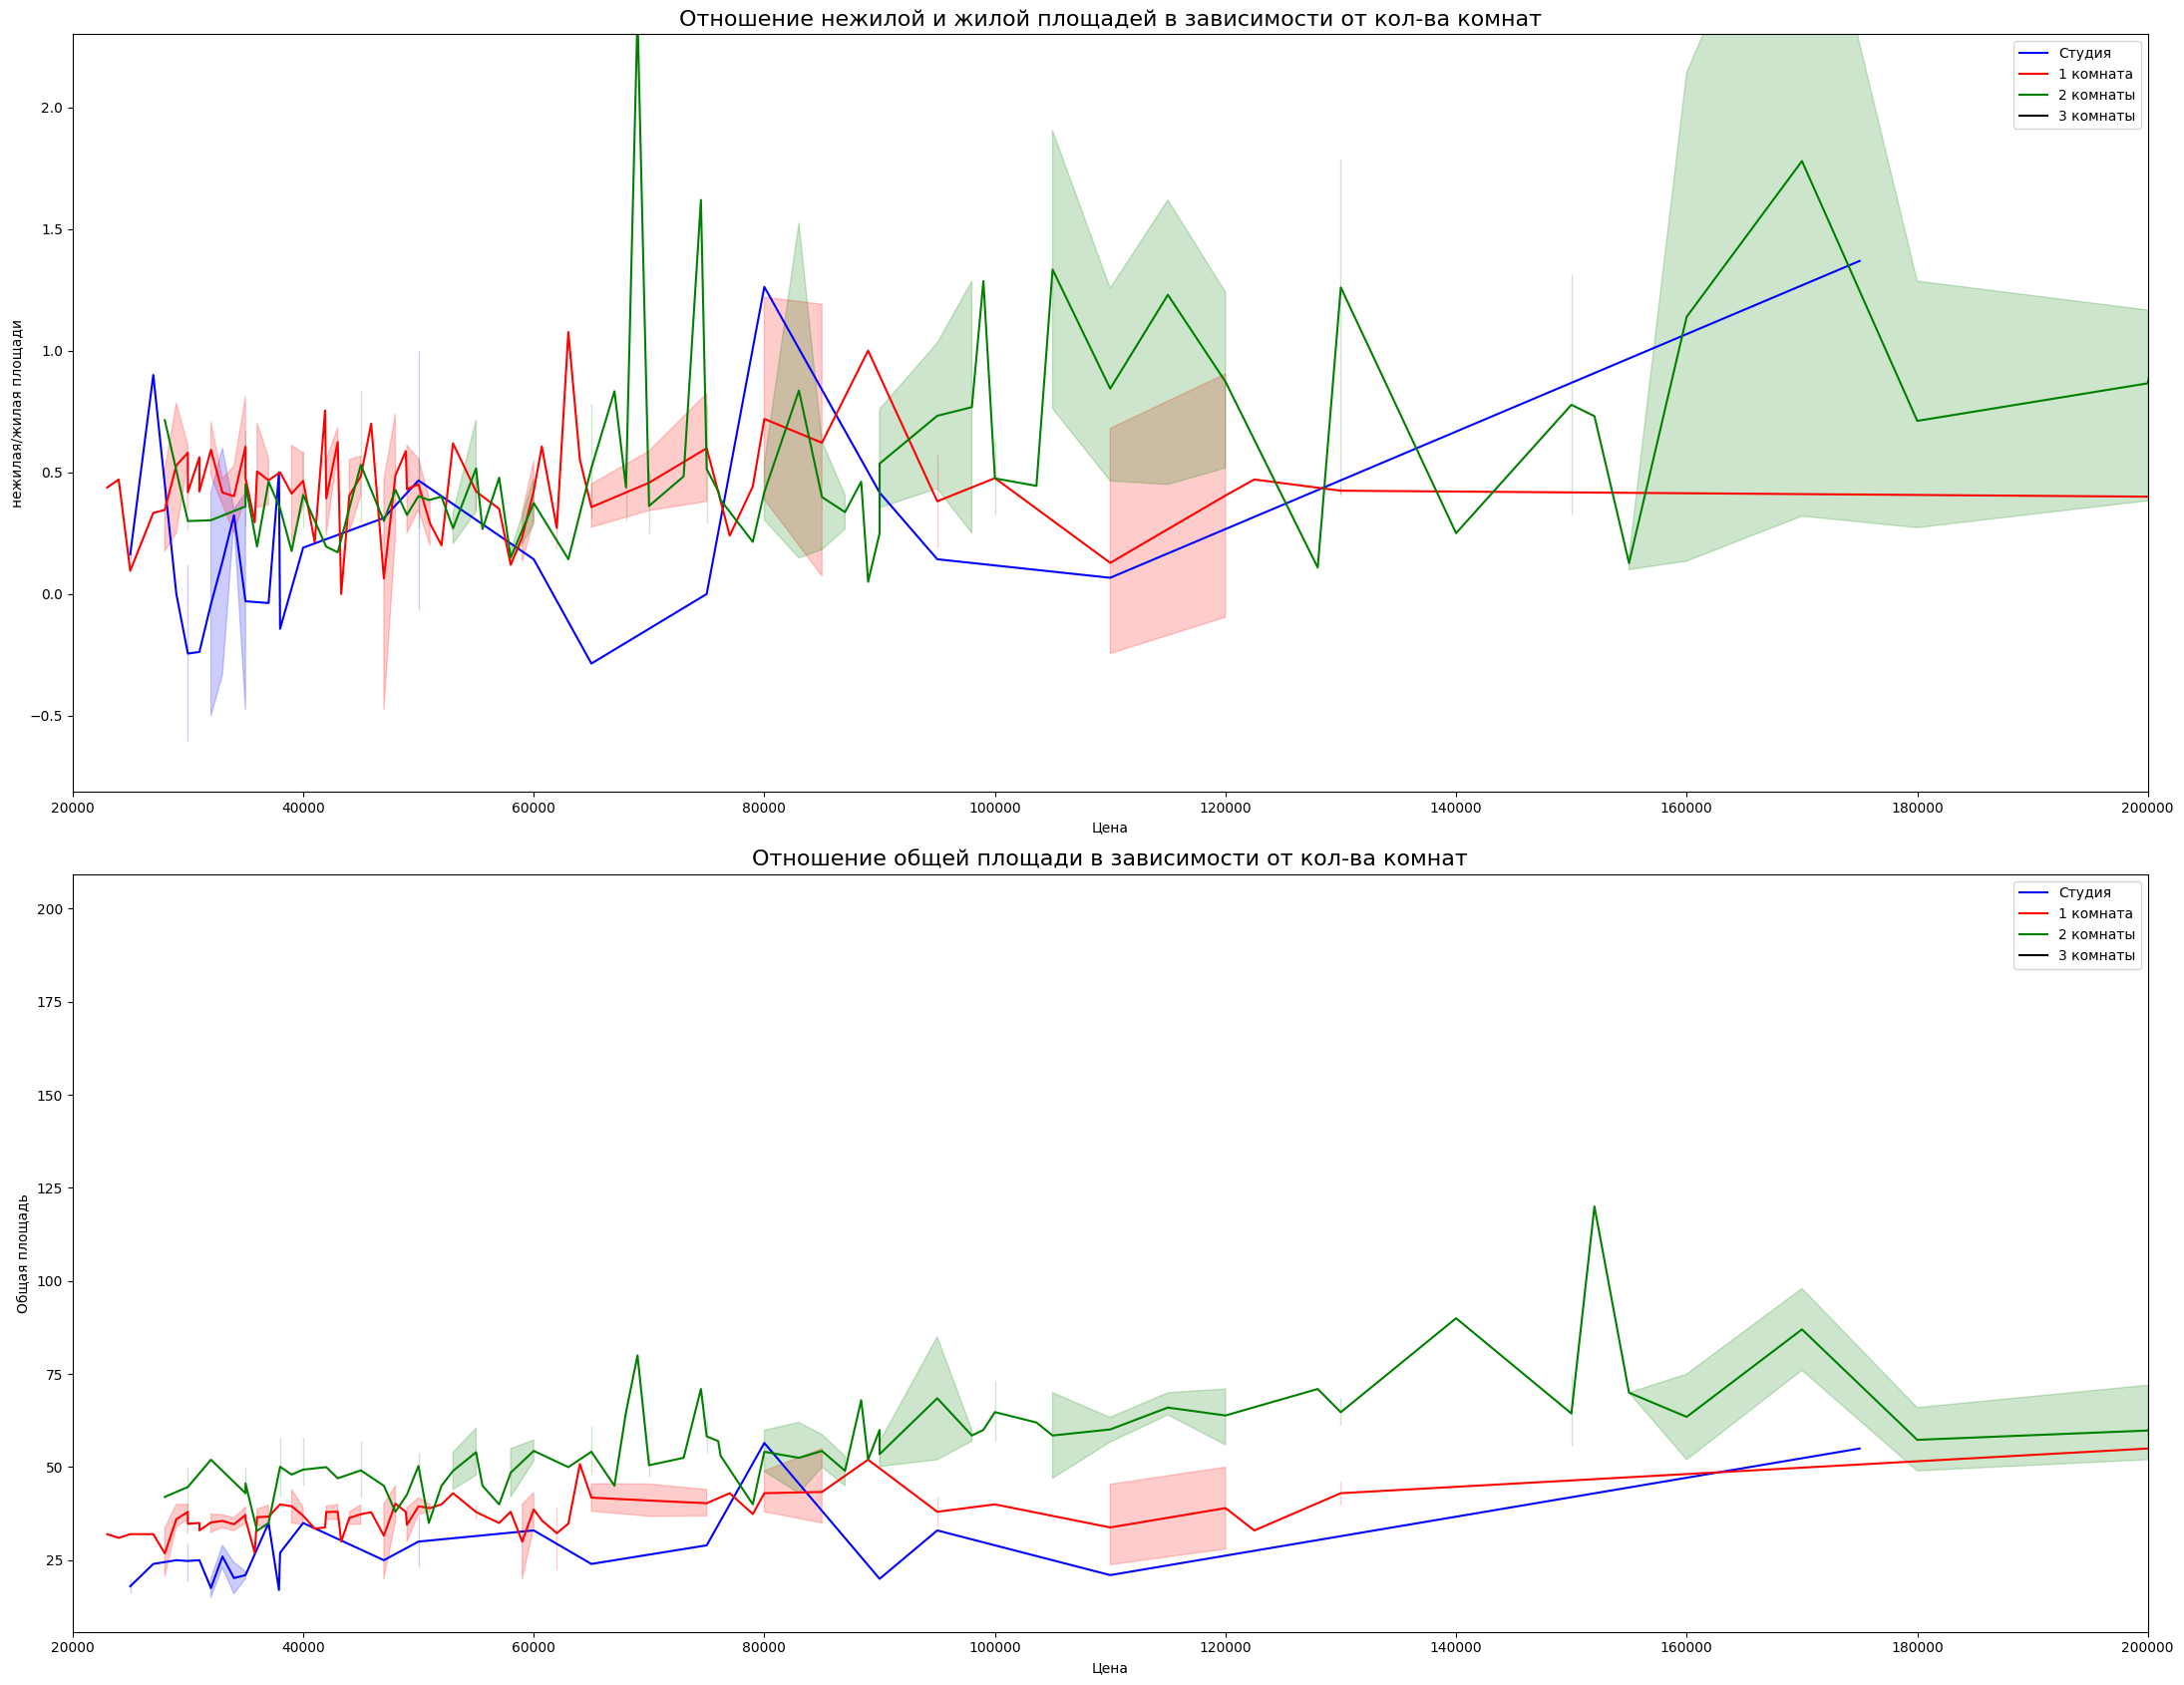

In [85]:


# Создание столбца 'нежилая/жилая площади'
df_info['нежилая/жилая площади'] = (df_info['Общая площадь'] - df_info['Площадь кухни'] - df_info['Жилая площадь']) / df_info['Жилая площадь']

# Выдлим данные в зависимости от кол-ва комнат или это студия
data_studio = df_info[df_info['Кол-во комнат'] == 'студия']
data_1_room = df_info[df_info['Кол-во комнат'] == '1']
data_2_rooms = df_info[df_info['Кол-во комнат'] == '2']
data_3_rooms = df_info[df_info['Кол-во комнат'] == '3']

plt.figure(figsize=(22,17))

plt.subplot(2,1,1)
plt.title('Отношение нежилой и жилой площадей в зависимости от кол-ва комнат', fontsize=16)

# Линейные графики для каждого количества комнат
sns.lineplot(data=data_studio, x='Цена', y='нежилая/жилая площади', color='b', label='Студия')
sns.lineplot(data=data_1_room, x='Цена', y='нежилая/жилая площади', color='r', label='1 комната')
sns.lineplot(data=data_2_rooms, x='Цена', y='нежилая/жилая площади', color='g', label='2 комнаты')
sns.lineplot(data=data_3_rooms, x='Цена', y='нежилая/жилая площади', color='k', label='3 комнаты')

plt.legend()

# установим пределы на осях, чтобы было нагляднее
plt.xlim(right=200000)  
plt.xlim(left=20000)
plt.ylim(top=2.3)

plt.subplot(2,1,2)
plt.title('Отношение общей площади в зависимости от кол-ва комнат', fontsize=16)

# Линейные графики для каждого количества комнат
sns.lineplot(data=data_studio, x='Цена', y='Общая площадь', color='b', label='Студия')
sns.lineplot(data=data_1_room, x='Цена', y='Общая площадь', color='r', label='1 комната')
sns.lineplot(data=data_2_rooms, x='Цена', y='Общая площадь', color='g', label='2 комнаты')
sns.lineplot(data=data_3_rooms, x='Цена', y='Общая площадь', color='k', label='3 комнаты')

plt.legend()

# установим пределы на осях, чтобы было нагляднее
plt.xlim(right=200000)  
plt.xlim(left=20000)

plt.tight_layout()
plt.show()



Здесь 3х комнатных вообще на наблюдается, что говорит о том, что на рынке их практически нет. У студия жилая площадь преобладает при всех ценах, что и является особенностью такого типа квартир, поэтому это не новость. Интереснее рассмотреть именно однушки и двушки. Можно заметить, что у бюдетных вариантов квартир (где то до 70к) у однушек отношение нежилой площади к жилой больше, однако, если рассмотреть нижний график, то можно понять, что у двушек при всех ценах выше площадь, причем значительно выще, поэтому скорее всего более высокое отношение нового признака у однушек в таком ценовом сегменте связано именно с с тем, что у двушек в целом больше площадь жилой площади при схожей нежилой, а не с тем, что у двушек площадь перераспределяется между нежилой площадью и жилой. При этом если рассматривать квартиры больше 70к, то там тоже выгоднее снимать двушку, так как за ту же цену можно получить большую площадь квартиры, при повышении процента нежилой площади, что очень важно, так как это говорит о качестве квартир (выше определили положительную завивимость цены от этого). Из этого можно выдвинуть __гипотезу 2__: 

__Гипотеза 2:__ всегда выгоднее снимать двушку, чем однушку


### Округа и районы

Мжно вывдвинуть еще одно о том, что процент жилой площади зависит от района\округа, в котором расположена квартира

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'ВАО'),
  Text(1, 0, 'ЗАО'),
  Text(2, 0, 'ЗелАО'),
  Text(3, 0, 'Московская область'),
  Text(4, 0, 'НАО (Новомосковский)'),
  Text(5, 0, 'Одинцовский городской округ'),
  Text(6, 0, 'САО'),
  Text(7, 0, 'СВАО'),
  Text(8, 0, 'СЗАО'),
  Text(9, 0, 'ЦАО'),
  Text(10, 0, 'ЮАО'),
  Text(11, 0, 'ЮВАО'),
  Text(12, 0, 'ЮЗАО')])

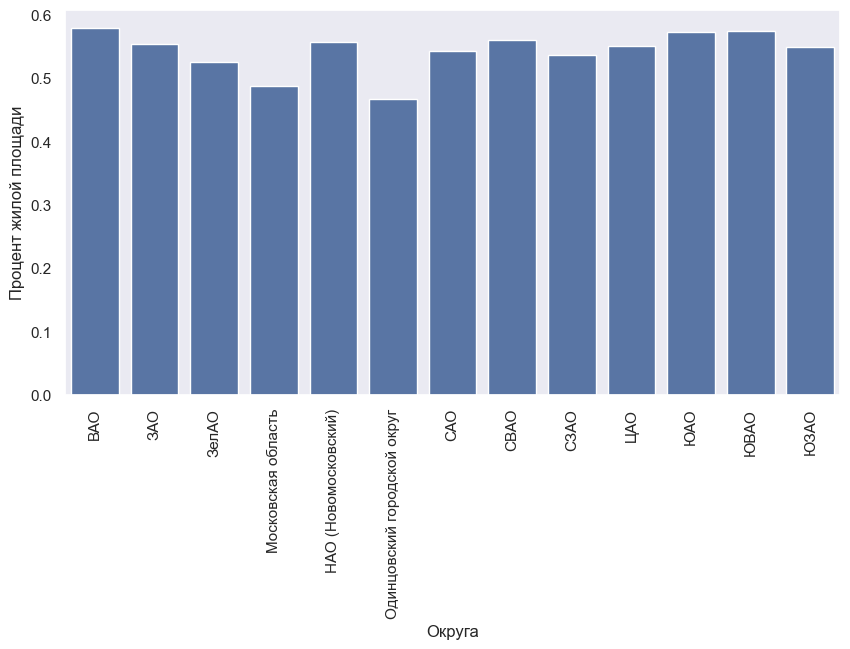

In [88]:
df_info['Процент жилой площади'] = df_info['Жилая площадь']/ df_info['Общая площадь']

plt.figure(figsize=(10,5))
sns.set(style='dark')
sns.barplot(x=df_info.groupby('Округа')['Процент жилой площади'].mean().index, y=df_info.groupby('Округа')['Процент жилой площади'].mean())
plt.xticks(rotation = 90)

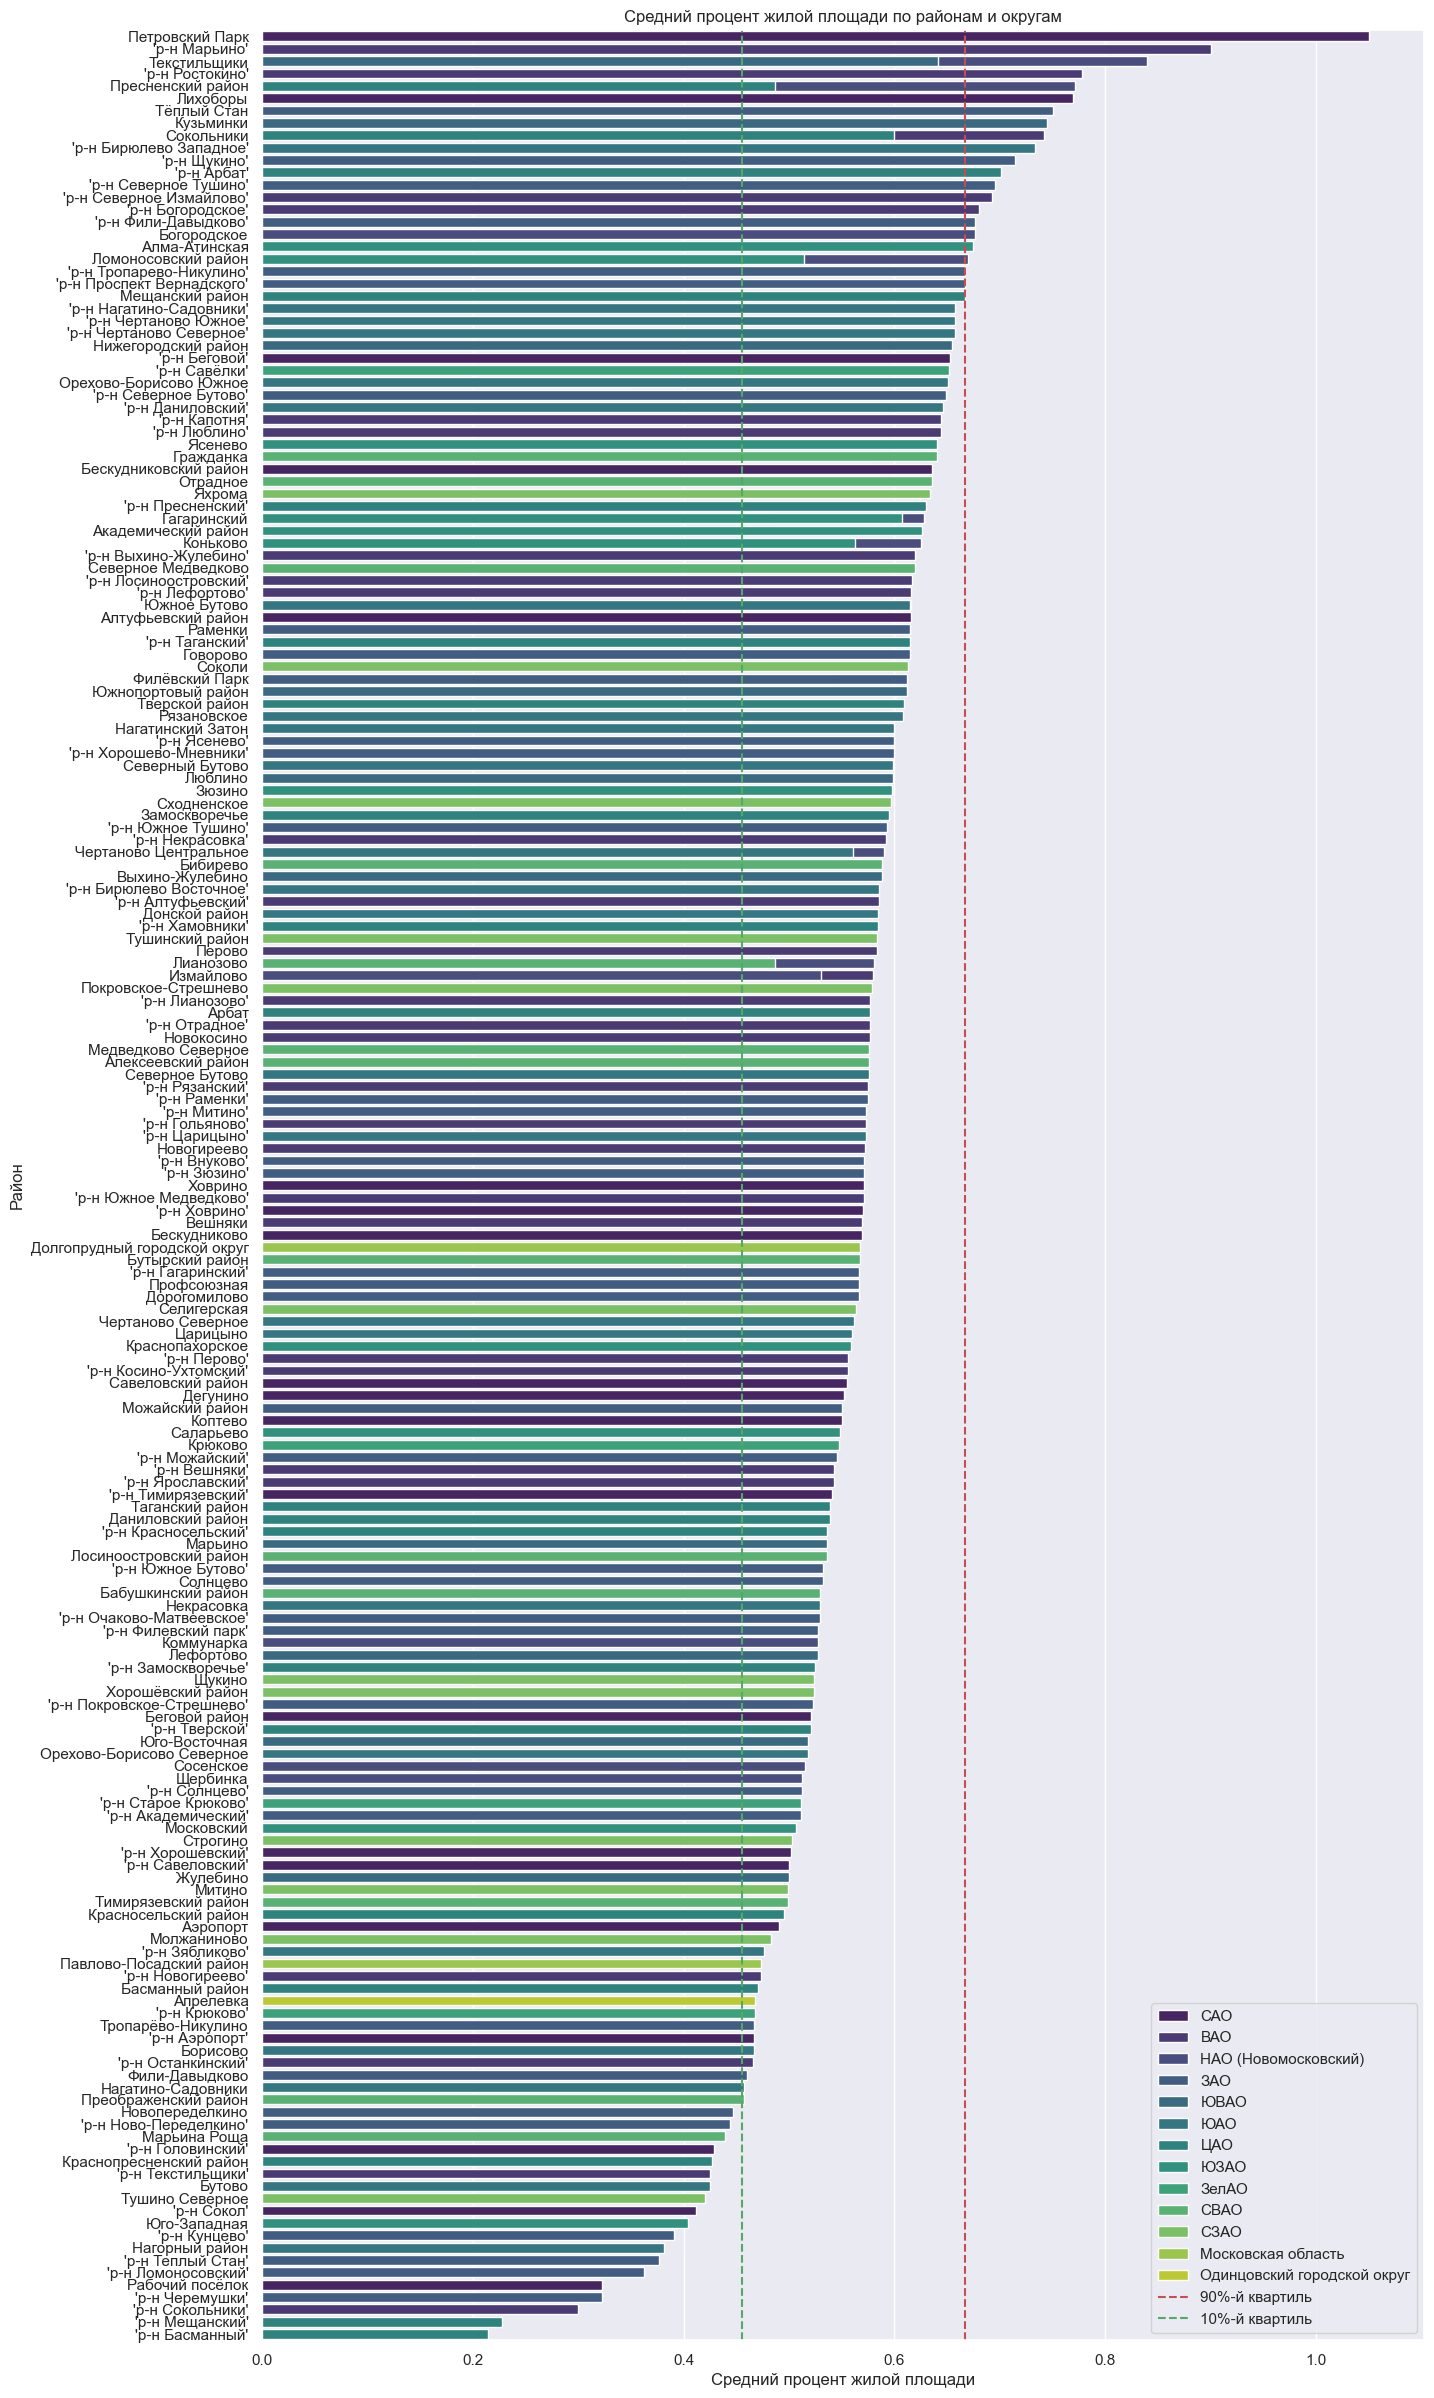

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 30))
sns.set(style='darkgrid')

# Группировка данных по округам и районам
grouped_data = df_info.groupby(['Округа', 'Районы'])['Процент жилой площади'].mean().reset_index()
sorted_data = grouped_data.sort_values(by='Процент жилой площади', ascending=False) # отсортируем по убыванию
sns.barplot(data=sorted_data, x='Процент жилой площади', y='Районы', hue='Округа', dodge=False, palette='viridis')

q90 = grouped_data['Процент жилой площади'].quantile(0.90)
q10 = grouped_data['Процент жилой площади'].quantile(0.10)

plt.axvline(x=q90, color='r', linestyle='--', label='90%-й квартиль')
plt.axvline(x=q10, color='g', linestyle='--', label='10%-й квартиль')

plt.xlabel('Средний процент жилой площади')
plt.ylabel('Район')
plt.title('Средний процент жилой площади по районам и округам')
plt.legend()

plt.show()



__Выводы:__ Видно, что процент жилой площади может значительно колебаться в зависимости от района, однако, делать какие то выводы по округам по этим данным невозможно. Возможно, обратимся еще к этому графику в дальнейшем

### Рассмотрим переменную 'Год постройки'

Рассмотрим зависимость переменных: 'Год постройки' и ' Площадь кухни', так как у переменных 'Год постройки' наибольший коэф пирсона именно с этой переменной

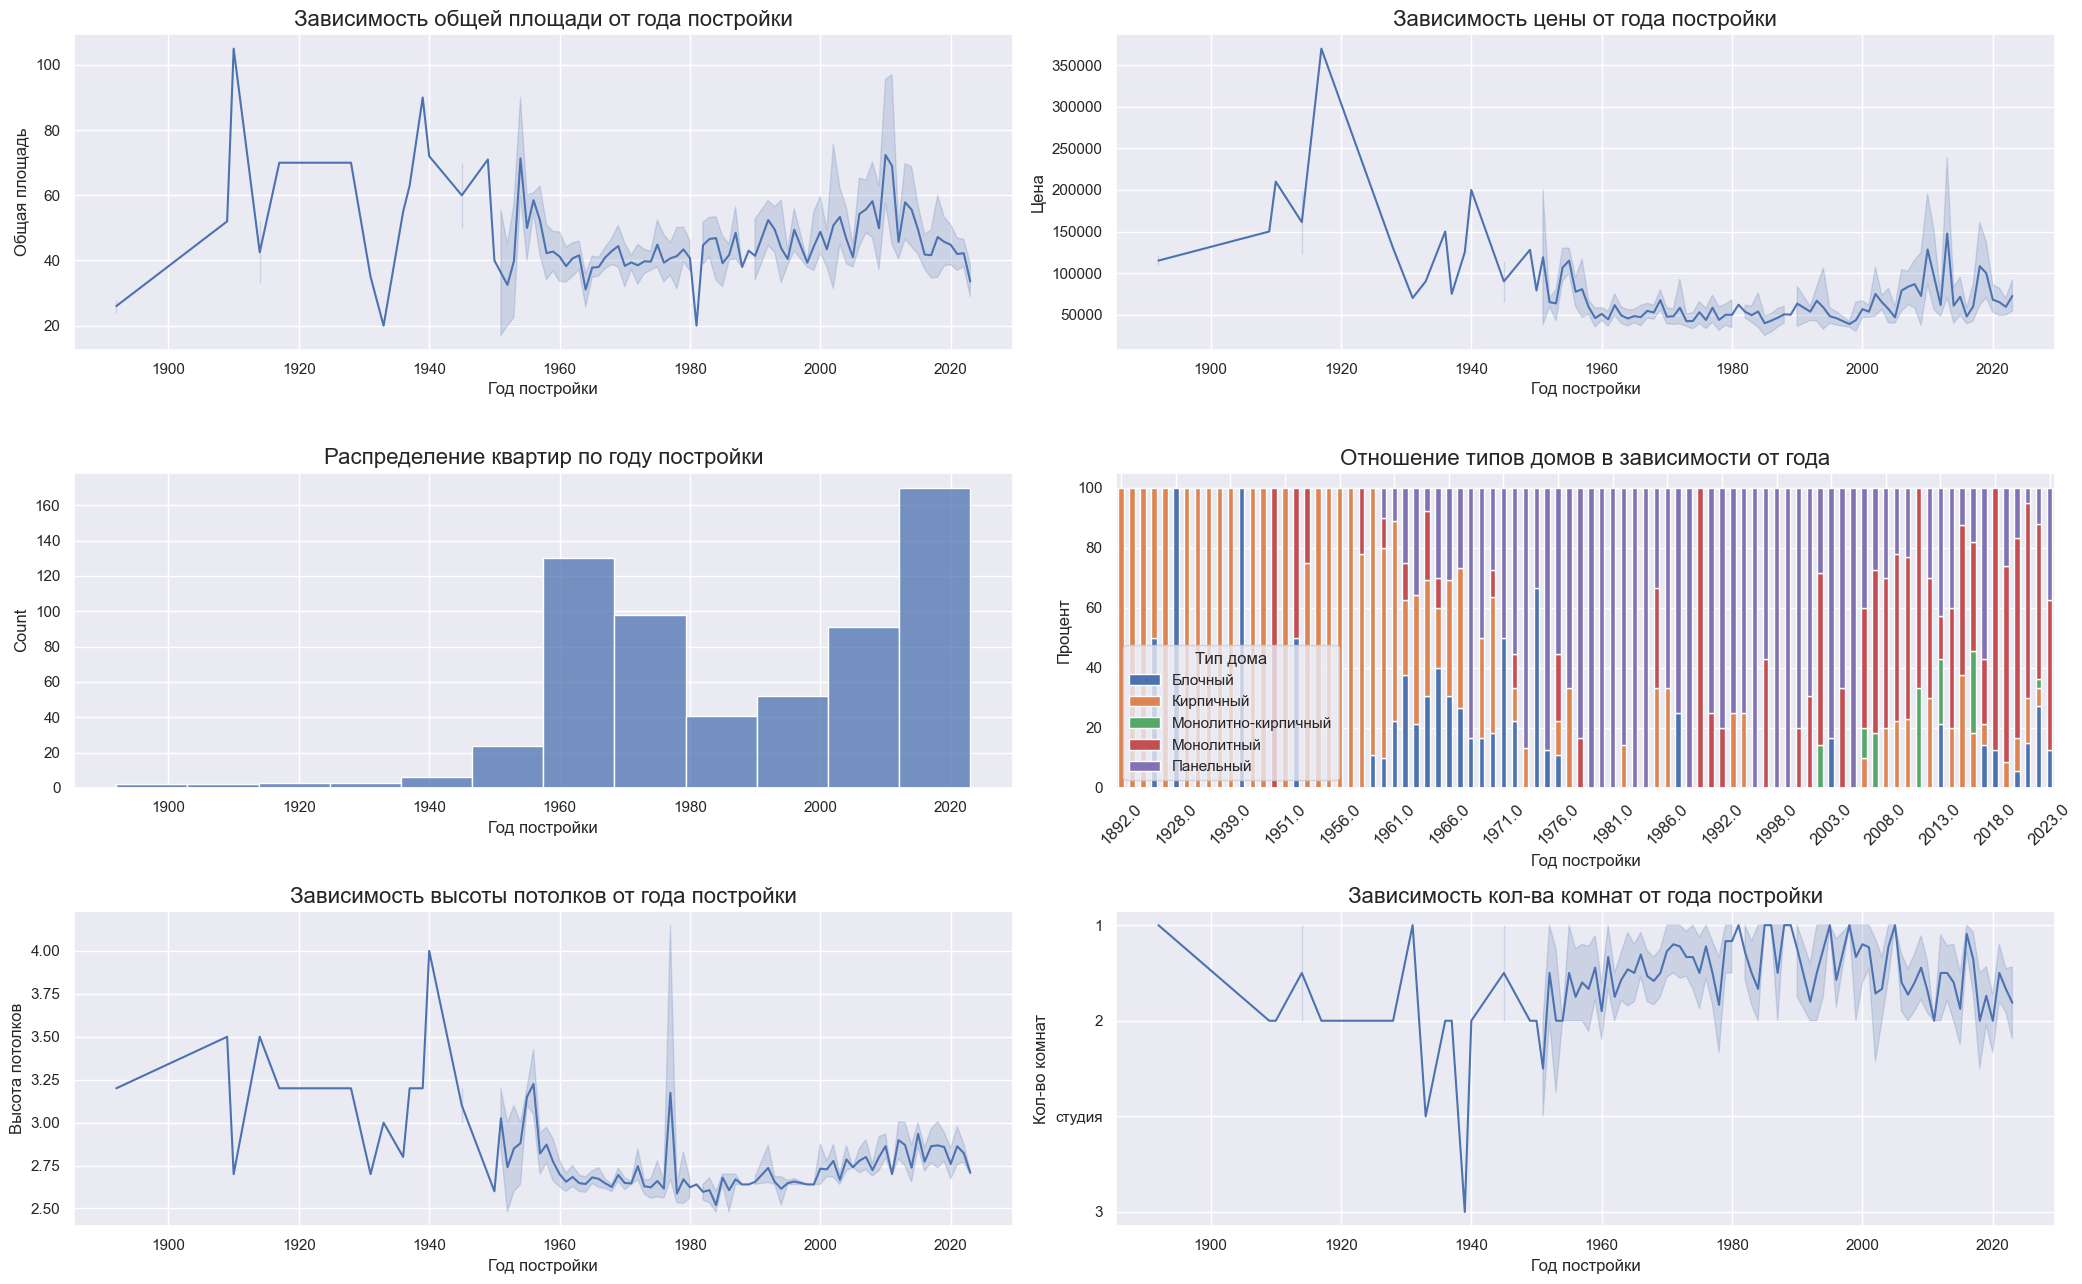

In [90]:
plt.figure(figsize=(21,13))

plt.subplot(3,2,1)
plt.title('Зависимость общей площади от года постройки', fontsize=16)
sns.lineplot(data=df_info, y='Общая площадь', x='Год постройки')

plt.subplot(3,2,2)
plt.title('Зависимость цены от года постройки', fontsize=16)
sns.lineplot(data=df_info, y='Цена', x='Год постройки')

plt.subplot(3,2,3)
plt.title('Распределение квартир по году постройки', fontsize=16)
sns.histplot(data=df_info, x='Год постройки')

plt.subplot(3,2,4)
pivot_table = df_info.pivot_table(index='Год постройки', columns='Тип дома', values='Общая площадь', aggfunc='count')
pivot_table = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100
ax = pivot_table.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Отношение типов домов в зависимости от года', fontsize=16)
plt.xlabel('Год постройки')
plt.ylabel('Процент')
plt.legend(title='Тип дома')
plt.xticks(rotation=45, fontsize=12)

# Прореживание годов на оси
labels = ax.get_xticklabels() 
n = 5  # Прореживание каждые 5 меток
ax.set_xticks(ax.get_xticks()[::n])  # Чтобы все не сливалось сделаем отметку года только для каждого пятого
ax.set_xticklabels([label.get_text() for label in labels][::n])

plt.subplot(3,2,5)
plt.title('Зависимость высоты потолков от года постройки', fontsize=16)
sns.lineplot(data=df_info, y='Высота потолков', x='Год постройки')

plt.subplot(3,2,6)
plt.title('Зависимость кол-ва комнат от года постройки', fontsize=16)
sns.lineplot(data=df_info, y='Кол-во комнат', x='Год постройки')

plt.tight_layout() 
plt.show()




Заметим, что здесь даже просто визуально можно поделить квартиры на периоды:
- дома, построенные до войны
- дома, построенные в 1940-1960 года
При этом достаточно много говорит график соотношения типов домов в зависимости от года:
до 1960х строили преимущественно кирпичные дома, после этого начали пробовать блочнвй и панельные типы. Однако, уже после 1970 года начали строить только панельки. Тенденция изменилась  только после 2000, когда начали больше строить монолитные дома, монолитно-кирпичные
- Заметно, что в где то в 1980 произошел пик спада по качеству домов, их количеству. Строились преимущественно панельки, домов сейчас таких мало, что может говорить об их низком качестве, при это снижения видно даже в высоте потолков, общей площади. 

In [91]:
# Группировка и агрегация
grouped_series = df_info.groupby('Тип дома').agg({
    'Цена': ['mean', 'median'], 
    'Жилая площадь': 'count', 
    'Общая площадь': 'mean', 
    'Год постройки': ['mean', 'median'],
    'Высота потолков': ['mean']
}).reset_index()

# Переименование столбцов
grouped_series.columns = [
    'Тип дома', 
    'Ср. Цена', 
    'Медианная цена', 
    'Количество', 
    'Ср общая площадь', 
    'Ср. год постройки', 
    'Медианный год постройки',
    'Ср. высота потолков',
]

# Фильтрация по количеству
filtered_series = grouped_series[grouped_series['Количество'] > 1]

filtered_series


,Тип дома,Ср. Цена,Медианная цена,Количество,Ср общая площадь,Ср. год постройки,Медианный год постройки,Ср. высота потолков
0,Блочный,67013.320000,52000.0,75,42.550667,1980.693333,1970.0,2.733200
1,Кирпичный,77197.124088,60000.0,137,47.295620,1969.656934,1963.0,2.820365
2,Монолитно-кирпичный,128629.583333,69000.0,12,62.625000,2011.833333,2013.0,2.815000
3,Монолитный,80291.660256,75000.0,156,47.522436,2008.679487,2016.0,2.829038
4,Панельный,47830.979339,41450.0,242,41.667769,1989.739669,1987.0,2.676983


Видно, что цена монолитные дома выше, чем у большинства. При этом это тип дома, который встречается еще в 50ые годы, а строить продолжают и в наше время. Выдвинули гипотезы:
__Гипотеза 3:__ что вне зависимости от года постройки монолитные дома всего ценятся выше, чем остальные.
__Гипотеза 3.1:__ кирпичные дома имеют низкую среднюю цену именно из за того, что большое количество старых кирпичных домов, которые занижают среднее, при этом цена все равно незначительно отличается от монолитного. Следовательно, цена нового кирпичного дома выше, чем цена нового монолитного.

### Рассмотрим перменную, задающую ближайшие от квартир станции метро

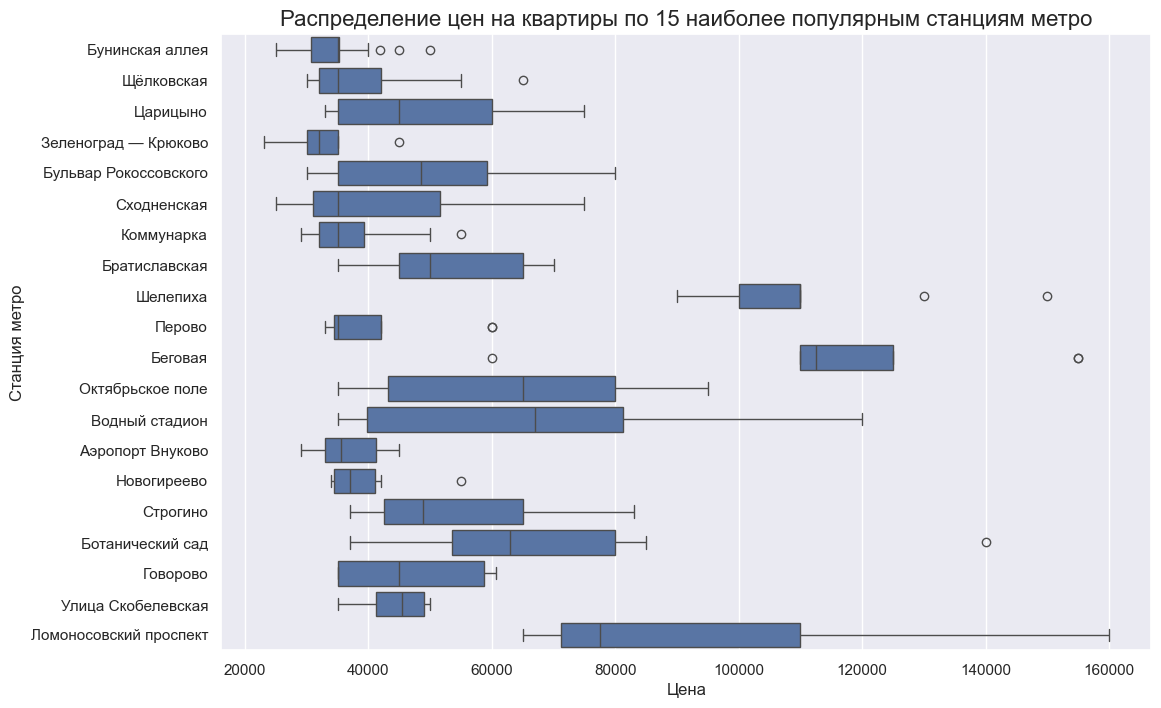

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

top_stations = df_info['Станция метро'].value_counts().head(20).index
filtered_data = df_info[df_info['Станция метро'].isin(top_stations)]

plt.figure(figsize=(12, 8)) 
sns.boxplot(x='Цена', y='Станция метро', data=filtered_data, order=top_stations)
plt.title('Распределение цен на квартиры по 15 наиболее популярным станциям метро', fontsize=16)
plt.xlabel('Цена')
plt.ylabel('Станция метро')
plt.show()


__Выводы:__

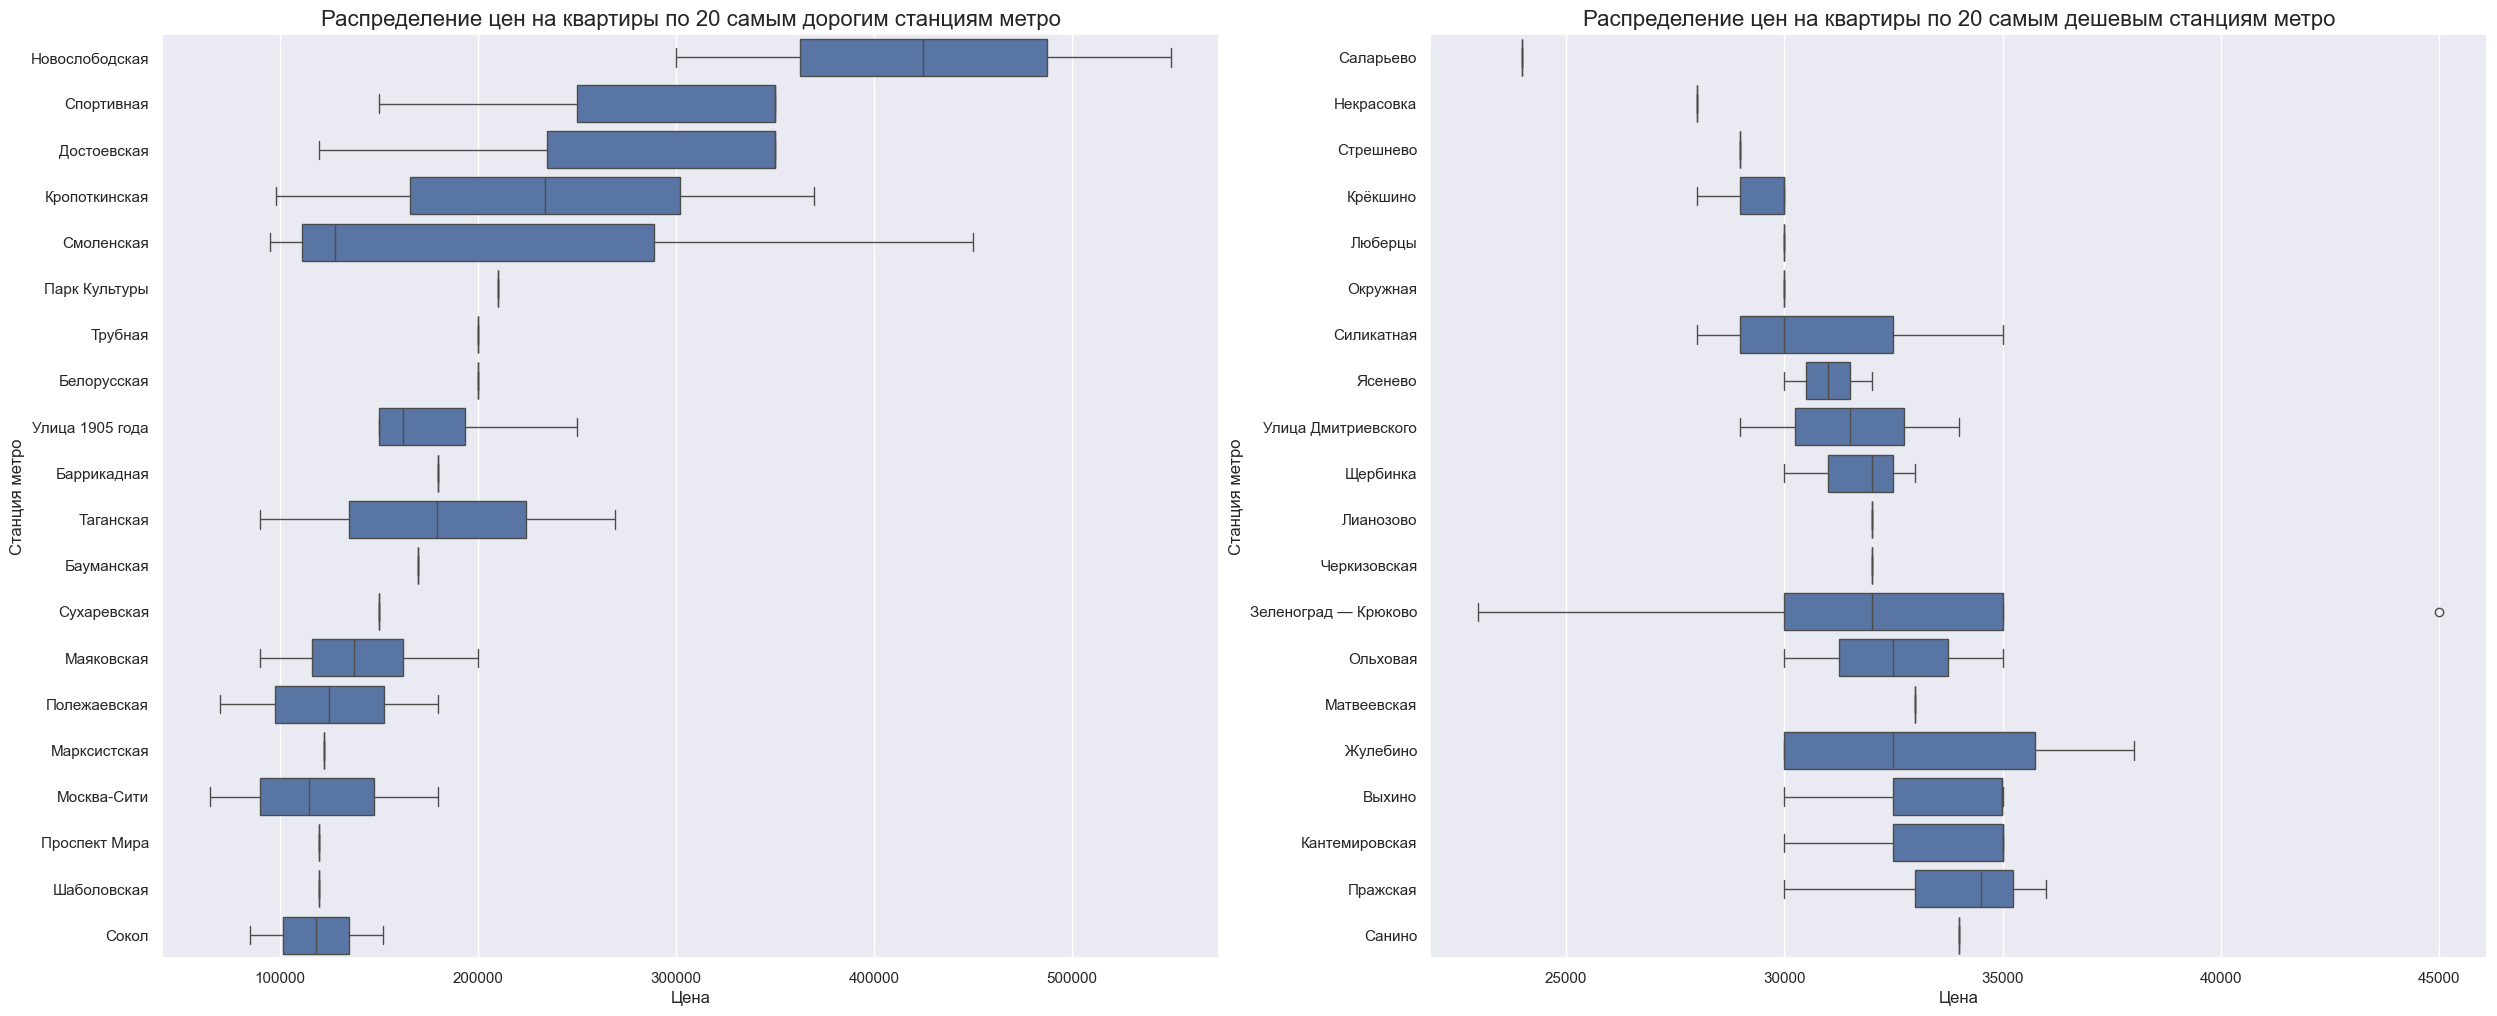

In [93]:
plt.figure(figsize=(30,12))

plt.subplot(1,2,1)
average_prices = df_info.groupby('Станция метро')['Цена'].mean().sort_values(ascending=False) # сгруппируем данные по станциям метро
top_expensive_stations = average_prices.head(20).index # выделим топ 20 самых дорогих станций
expensive_filtered_data = df_info[df_info['Станция метро'].isin(top_expensive_stations)] 
sns.boxplot(x='Цена', y='Станция метро', data=expensive_filtered_data, order=top_expensive_stations)
plt.title('Распределение цен на квартиры по 20 самым дорогим станциям метро', fontsize=16)
plt.xlabel('Цена')
plt.ylabel('Станция метро')

plt.subplot(1,2,2)
average_prices = df_info.groupby('Станция метро')['Цена'].mean().sort_values(ascending=True) # сгруппируем данные по станциям метро
top_cheapest_stations = average_prices.head(20).index # выделим топ 20 самых дешевых станций
cheap_filtered_data = df_info[df_info['Станция метро'].isin(top_cheapest_stations)]
sns.boxplot(x='Цена', y='Станция метро', data=cheap_filtered_data, order=top_cheapest_stations)
plt.title('Распределение цен на квартиры по 20 самым дешевым станциям метро', fontsize=16)
plt.xlabel('Цена')
plt.ylabel('Станция метро')

plt.show()


__Распределение цен на квартиры по 20 самым дорогим станциям метро__:
- Все представленные станции метро демонстрируют высокие цены на квартиры
- На многих станциях наблюдается значительный разброс цен, что может указывать на разнообразие типов жилья (от элитного до среднего класса) в этих районах.
- Новослободская: Самая дорогая станция, с широким разбросом цен. Усы на графике и выбросы указывают на наличие очень дорогих квартир. При этом цены на этой станции в значительной мере доложе, чем на осальных станциях.
- Спортивная и Достоевская: Тоже демонстрируют высокие цены на квартиры, но разброс цен ниже.
- Кропоткинская и Смоленская: На этих станциях широких диапазон различных типов квартир. Есть достаточное кол-во как элитных квартир, так и более бюджетных вариантов.
- Парк Культуры, Трубная, Белоруссая и тп: Имеют совсем небольшой дианазон цен.
- У все остальных станций метро цены тоже достаточно высокие, но разброс значительно ниже.


__Распределение цен на квартиры по 20 самым дешевым станциям метро__:
- На большинстве станций наблюдается небольшой разброс цен, что указывает на однородность квартир в этих районах.
Исключение - станция "Зеленоград — Крюково", где значительный диапазон цен, возможно, из-за разнообразия типов и состояния квартир в этом районе.
- Для большинства станций метро количество выбросов минимально, что указывает на стабильность цен в этих районах.
- Станции, такие как "Саларьево", "Некрасовка", "Стрешнево" и "Крёкшино", демонстрируют самые низкие цены на квартиры